In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("../../data/rfc_matchdata.csv")
df.head()

,Opponent,Round,Date,Manager,rfc_league_position,opp_league_position,rfc_Score,opp_Score,Result,Venue,...,opp_Interceptions,opp_GK_Saves_1st,opp_GK_Saves_2nd,opp_GK_Saves,opp_xGOT_Faced_1st,opp_xGOT_Faced_2nd,opp_xGOT_Faced,opp_GK_Goals_Prevented_1st,opp_GK_Goals_Prevented_2nd,opp_GK_Goals_Prevented
0,Lincoln,1,02/08/2025,Noel Hunt,NaN,NaN,0,2,L,A,...,13,1,1,2,0.13,0.43,0.56,0.13,0.43,0.56
1,Huddersfield,2,09/08/2025,Noel Hunt,23.0,2.0,0,2,L,H,...,8,0,2,2,0.00,0.41,0.41,0.00,0.41,0.41
2,Wimbledon,3,16/08/2025,Noel Hunt,24.0,10.0,1,2,L,H,...,3,0,2,2,0.00,0.52,0.52,0.00,-0.48,-0.48
3,Bolton,4,20/08/2025,Noel Hunt,22.0,16.0,1,1,D,A,...,3,0,1,1,0.00,0.49,0.49,0.00,-0.51,-0.51
4,Wycombe,5,23/08/2025,Noel Hunt,21.0,20.0,2,2,D,A,...,8,2,2,4,0.39,0.30,0.69,-1.61,0.30,-1.31


In [19]:
df["Win"]  = (df["Result"] == "W").astype(int)
df["Draw"] = (df["Result"] == "D").astype(int)
df["Loss"] = (df["Result"] == "L").astype(int)
df["Points"] = df["Win"] * 3 + df["Draw"]


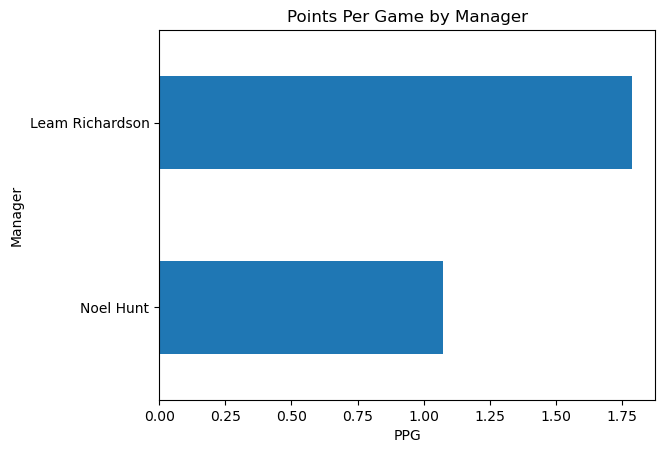

In [20]:
ppg = df.groupby("Manager")["Points"].mean()

plt.figure()
ppg.sort_values().plot(kind="barh")
plt.title("Points Per Game by Manager")
plt.xlabel("PPG")
plt.ylabel("Manager")
plt.show()


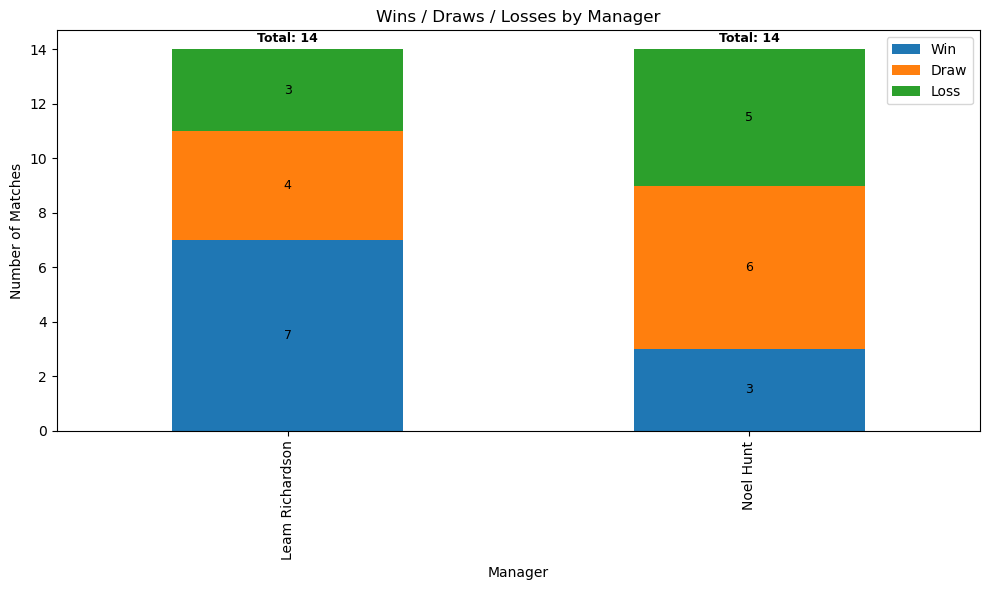

In [44]:
# Ensure W/D/L flags exist (adjust if your Result values differ)
df["Win"]  = (df["Result"] == "W").astype(int)
df["Draw"] = (df["Result"] == "D").astype(int)
df["Loss"] = (df["Result"] == "L").astype(int)

# Aggregate COUNT of W/D/L by manager
wdl = df.groupby("Manager")[["Win", "Draw", "Loss"]].sum()

# Plot stacked bar chart
ax = wdl.plot(kind="bar", stacked=True, figsize=(10, 6))

ax.set_title("Wins / Draws / Losses by Manager")
ax.set_ylabel("Number of Matches")
ax.set_xlabel("Manager")

# Add segment labels (counts) centered in each stacked section
for container in ax.containers:
    labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Add total matches label above each bar
totals = wdl.sum(axis=1).values
for i, total in enumerate(totals):
    ax.text(i, total + 0.15, f"Total: {int(total)}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()

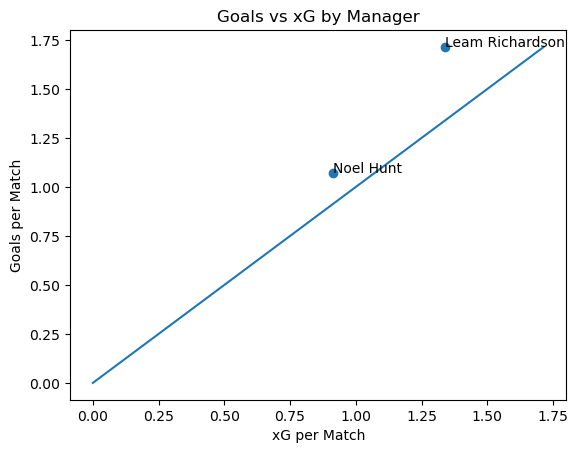

In [22]:
attack = (
    df.groupby("Manager")
      .agg(
          xG=("rfc_xG", "mean"),
          Goals=("rfc_Score", "mean")
      )
)

plt.figure()
plt.scatter(attack["xG"], attack["Goals"])

for manager in attack.index:
    plt.text(
        attack.loc[manager, "xG"],
        attack.loc[manager, "Goals"],
        manager
    )

plt.plot([0, attack.max().max()], [0, attack.max().max()])
plt.xlabel("xG per Match")
plt.ylabel("Goals per Match")
plt.title("Goals vs xG by Manager")
plt.show()


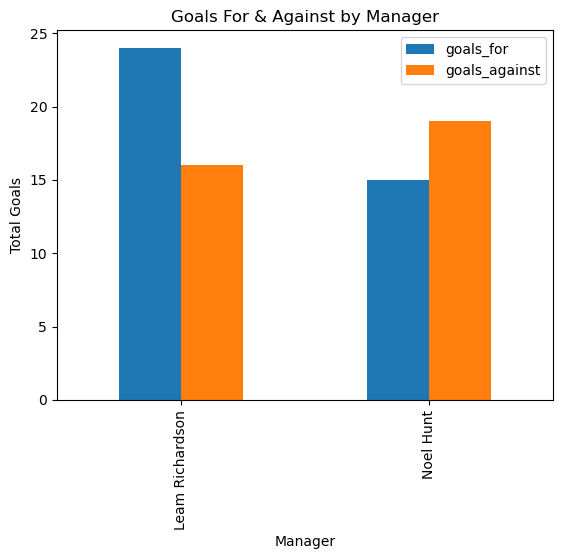

In [35]:
goals = (
    df.groupby("Manager")
      .agg(
          goals_for=("rfc_Score", "sum"),
          goals_against=("opp_Score", "sum")
      )
)

goals.plot(kind="bar")
plt.title("Goals For & Against by Manager")
plt.ylabel("Total Goals")
plt.xlabel("Manager")
plt.show()

In [46]:
avg_opp_position = (
    df.groupby("Manager")
      .agg(
          avg_opp_position=("opp_league_position", "mean")
      )
      .round(2)
      .sort_values("avg_opp_position")
)

print(avg_opp_position)



                 avg_opp_position
Manager                          
Noel Hunt                   11.77
Leam Richardson             13.14


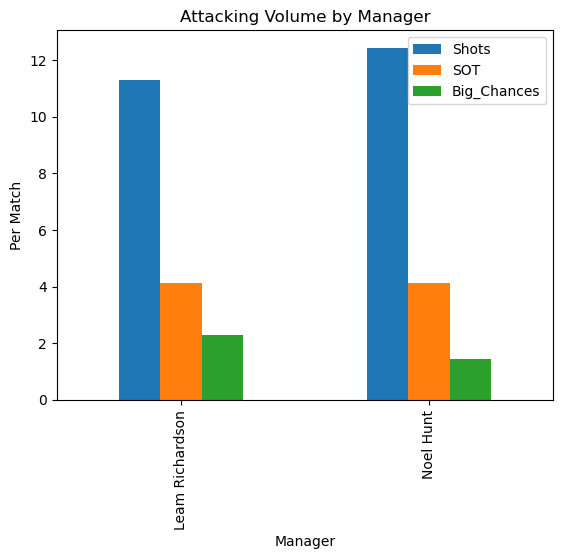

In [23]:
shots = (
    df.groupby("Manager")
      .agg(
          Shots=("rfc_Shots", "mean"),
          SOT=("rfc_SOT", "mean"),
          Big_Chances=("rfc_BigChances", "mean")
      )
)

shots.plot(kind="bar")
plt.title("Attacking Volume by Manager")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()


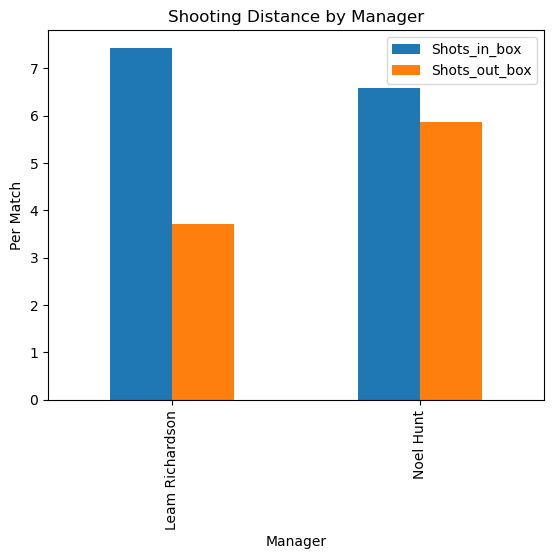

In [31]:
shot_distance = (
    df.groupby("Manager")
      .agg(
          Shots_in_box=("rfc_Shots_Inside_Box", "mean"),
          Shots_out_box=("rfc_Shots_Outside_Box", "mean")
      )
)

shot_distance.plot(kind="bar")
plt.title("Shooting Distance by Manager")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()

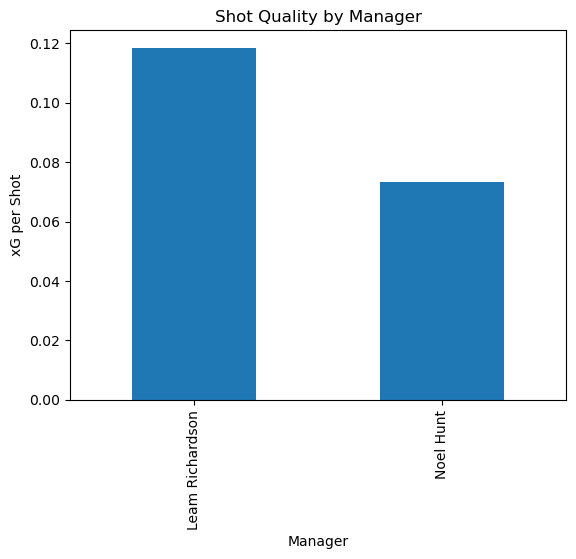

In [38]:
shot_quality = (
    df.groupby("Manager")
      .agg(
          xG=("rfc_xG", "mean"),
          Shots=("rfc_Shots", "mean")
      )
)

shot_quality["xG_per_Shot"] = shot_quality["xG"] / shot_quality["Shots"]

shot_quality["xG_per_Shot"].plot(kind="bar")
plt.title("Shot Quality by Manager")
plt.ylabel("xG per Shot")
plt.xlabel("Manager")
plt.show()


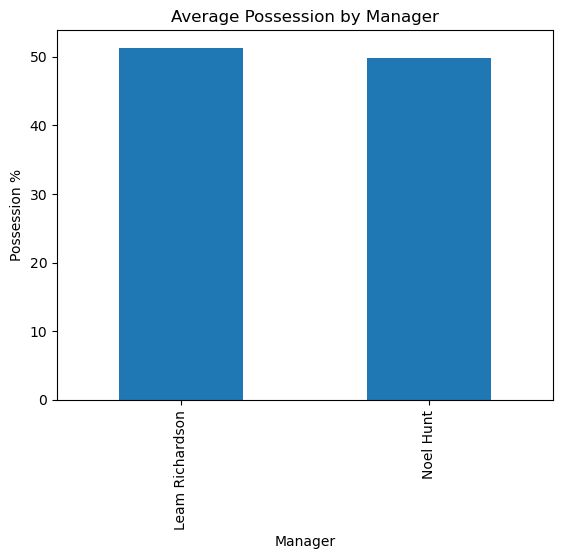

In [26]:
possession = (
    df.groupby("Manager")[["rfc_Possesion", "opp_Possesion"]]
      .mean()
)

plt.figure()
possession["rfc_Possesion"].plot(kind="bar")
plt.title("Average Possession by Manager")
plt.ylabel("Possession %")
plt.xlabel("Manager")
plt.show()


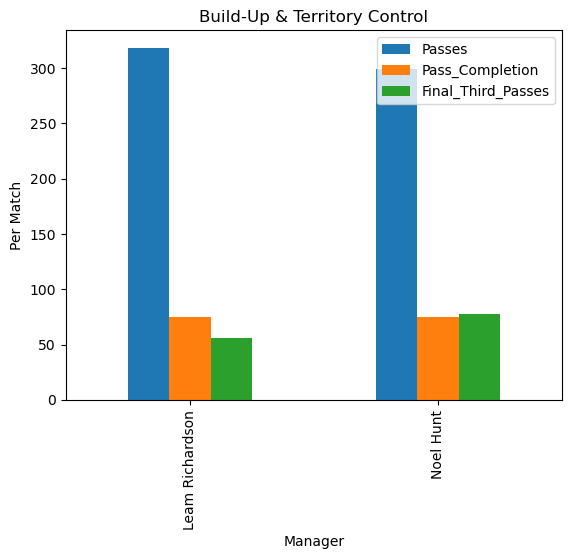

In [27]:
passing = (
    df.groupby("Manager")
      .agg(
          Passes=("rfc_Passes", "mean"),
          Pass_Completion=("rfc_Pass%", "mean"),
          Final_Third_Passes=("rfc_Passes_In_Final_Third", "mean")
      )
)

passing.plot(kind="bar")
plt.title("Build-Up & Territory Control")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()


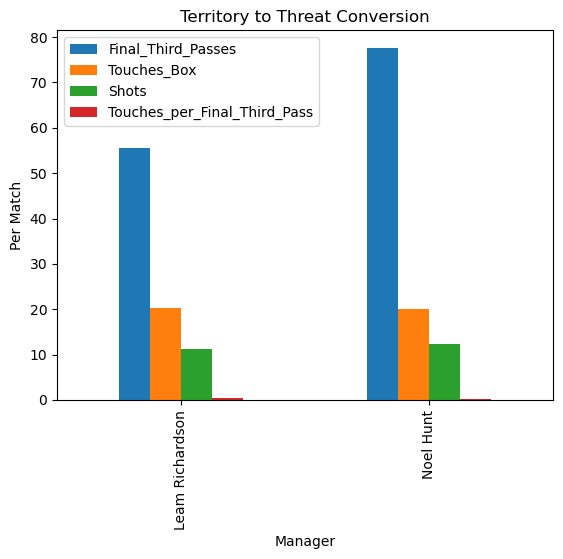

In [39]:
territory = (
    df.groupby("Manager")
      .agg(
          Final_Third_Passes=("rfc_Passes_In_Final_Third", "mean"),
          Touches_Box=("rfc_Touches_In_Opp_Box", "mean"),
          Shots=("rfc_Shots", "mean")
      )
)

territory["Touches_per_Final_Third_Pass"] = (
    territory["Touches_Box"] / territory["Final_Third_Passes"]
)

territory.plot(kind="bar")
plt.title("Territory to Threat Conversion")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()


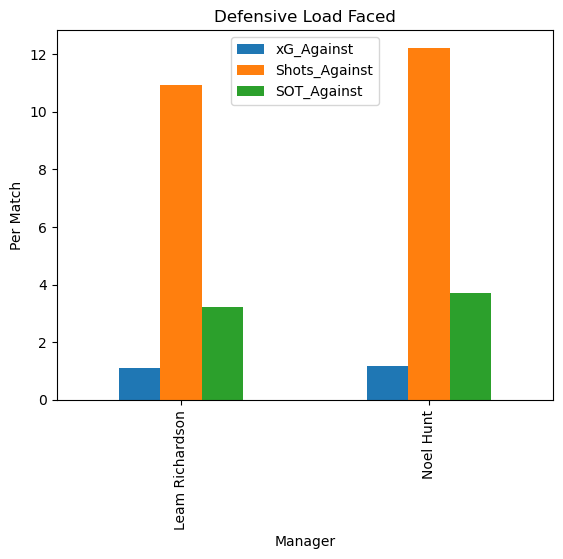

In [28]:
defence = (
    df.groupby("Manager")
      .agg(
          xG_Against=("opp_xG", "mean"),
          Shots_Against=("opp_Shots", "mean"),
          SOT_Against=("opp_SOT", "mean")
      )
)

defence.plot(kind="bar")
plt.title("Defensive Load Faced")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()


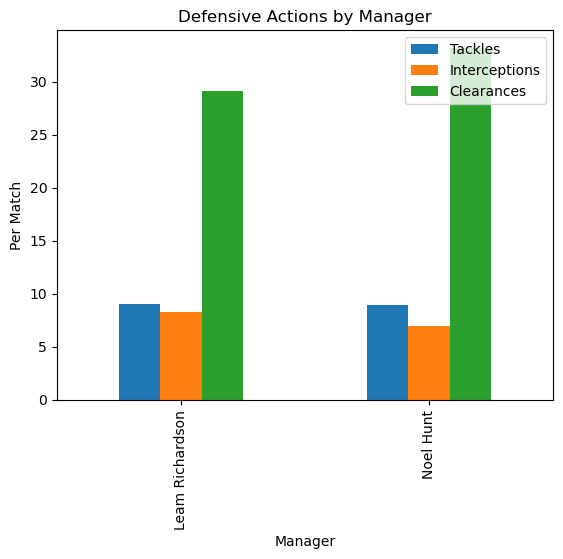

In [29]:
actions = (
    df.groupby("Manager")
      .agg(
          Tackles=("rfc_Tackles", "mean"),
          Interceptions=("rfc_Interceptions", "mean"),
          Clearances=("rfc_Clearances", "mean")
      )
)

actions.plot(kind="bar")
plt.title("Defensive Actions by Manager")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()


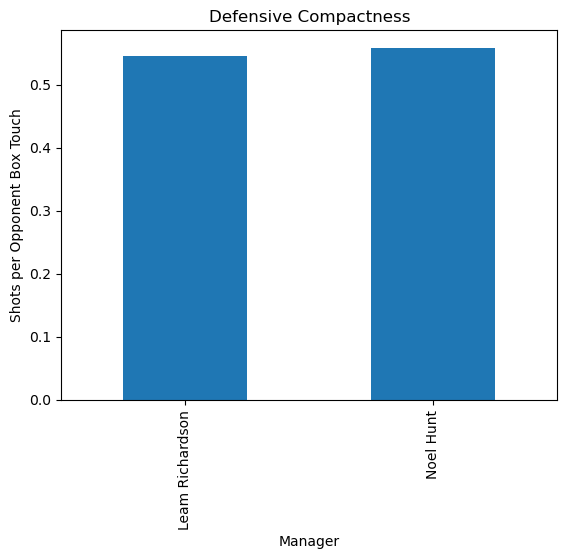

In [40]:
compactness = (
    df.groupby("Manager")
      .agg(
          Opp_Touches_Box=("opp_Touches_In_Opp_Box", "mean"),
          Opp_Shots=("opp_Shots", "mean")
      )
)

compactness["Shots_per_Box_Touch"] = (
    compactness["Opp_Shots"] / compactness["Opp_Touches_Box"]
)

compactness["Shots_per_Box_Touch"].plot(kind="bar")
plt.title("Defensive Compactness")
plt.ylabel("Shots per Opponent Box Touch")
plt.xlabel("Manager")
plt.show()


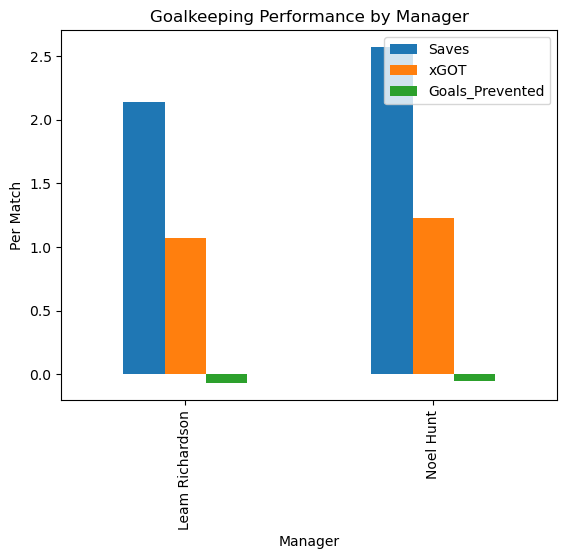

In [30]:
gk = (
    df.groupby("Manager")
      .agg(
          Saves=("rfc_GK_Saves", "mean"),
          xGOT=("rfc_xGOT_Faced", "mean"),
          Goals_Prevented=("rfc_GK_Goals_Prevented", "mean")
      )
)

gk.plot(kind="bar")
plt.title("Goalkeeping Performance by Manager")
plt.ylabel("Per Match")
plt.xlabel("Manager")
plt.show()
